#### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

## 1 Logistic Regression

In [2]:
data = np.loadtxt('ex2data1.txt', delimiter=',')

x = data[:,:2]
y = data[:,2]#[np.newaxis].T
print(x.shape, y.shape)

(100, 2) (100,)


### 1.1 Visualizing the data

Create two sets of data for x: admitted and not admitted based off of array y. 

In [3]:
pos = np.array([x[i] for i in range(x.shape[0]) if y[i] == 1])
neg = np.array([x[i] for i in range(x.shape[0]) if y[i] == 0])

Plot function that'll be used throughout the rest of this notebook.

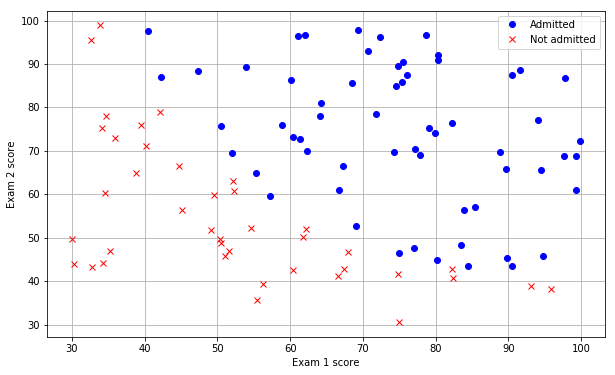

In [53]:
def plot_admit():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0], pos[:,1],'bo', label='Admitted')
    plt.plot(neg[:,0], neg[:,1], 'rx', label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
plot_admit()

### 1.2 Implementation

Inserting a column of 1's in the x array

In [4]:
m, n = x.shape
x = np.insert(x, 0, 1, axis=1)
x.shape

(100, 3)

Creating the logistic cost function. I did it in a two step processes, creating a sigmoid function and then the actual cost function

In [5]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

def cost(theta, x, y):
    h = sigmoid(np.dot(x, theta)) 
    cost = -1*(1/m) * (np.dot(np.log(h).T, y) + np.dot(np.log(1-h).T, 1-y))
    return cost

Creates the gradient descent of the regression.

In [6]:
def gradient(theta, x, y):
    h = sigmoid(np.dot(x, theta))
    
    gradient = (1/m) * np.dot(x.T, (h-y))
    return gradient

In [23]:
print(x.shape, initial_theta.shape)

test = np.dot(x, initial_theta)
test.shape

(100, 3) (3,)


(100,)

Testing the cost function and gradient descent.

In [7]:
initial_theta = np.zeros(n+1)
print('gradient at zeros:', gradient(initial_theta, x, y))
print('cost at zeros:', cost(initial_theta, x, y))

gradient at zeros: [ -0.1        -12.00921659 -11.26284221]
cost at zeros: 0.6931471805599453


Using scipy optimize to do the same thing as above. This is simpler.

In [8]:
def sci_opt(theta, in_x, in_y):
    res = optimize.fmin(cost,
                        theta,
                        args = (in_x, in_y),    
                        maxiter = 400,
                        full_output = True)
    return res[0], res[1]

In [9]:
theta_sci, cost_sci = sci_opt(initial_theta, x, y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [10]:
cost(theta_sci, x, y)

0.2034977015902151

In [11]:
theta_sci

array([-25.16130062,   0.20623142,   0.20147143])

In [12]:
boundary_x = np.array([np.min(x[:,1]), np.max(x[:,1])])
boundary_y = (-1./theta_sci[2])*(theta_sci[0] + theta_sci[1]*boundary_x)

plot_admit()
plt.plot(boundary_x, boundary_y, 'k-', label = 'Descision boundary')
plt.legend()

NameError: name 'plot_admit' is not defined

A function that predicts if a student is admitted based on a set of 2 test scores. Threshold is set at 0.5, so h must be greater or equal to 0.5 for a student to be admitted.

In [38]:
def predict(theta, x):
    pred = np.zeros(m)
    pred = sigmoid(np.dot(x, theta)) >= 0.5
    return pred

In [39]:
prob = sigmoid(np.dot([1, 45, 85], theta_sci))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

For a student with scores 45 and 85,we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002



In [40]:
p = predict(theta_sci, x)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


### 2 Regularized logistic regression

In [2]:
data2 = np.loadtxt('ex2data2.txt', delimiter = ',')
x2 = data2[:,:2]
x2 = np.insert(x2, 0, 1, axis=1)
y2 = data2[:,-1]

print(x2.shape, y2.shape)

(118, 3) (118,)


### 2.1 Visualizing the data

Again, creating positive/negatives for our data.

In [3]:
pos2 = np.array([x2[i] for i in range(x2.shape[0]) if y2[i] == 1])
neg2 = np.array([x2[i] for i in range(x2.shape[0]) if y2[i] == 0])

Creating a graph function for our data that will be used later on. 

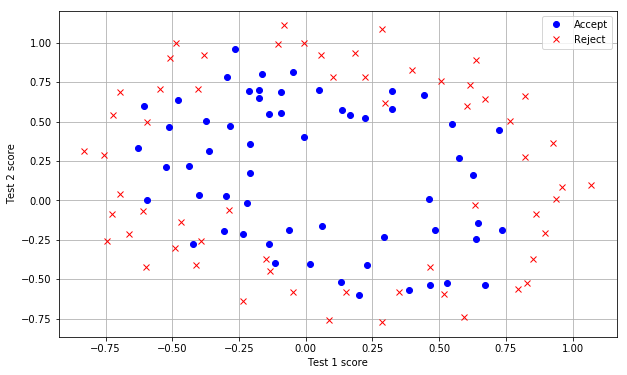

In [4]:
def plot_QA():
    plt.figure(figsize=(10,6))
    plt.plot(pos2[:,1], pos2[:,2],'bo', label='Accept')
    plt.plot(neg2[:,1], neg2[:,2], 'rx', label='Reject')
    plt.xlabel('Test 1 score')
    plt.ylabel('Test 2 score')
    plt.legend()
    plt.grid(True)
    
plot_QA()

### 2.1 Feature mapping

Increasing the number of features to 28 so that we can overfit and hopefully implement regularized logistic regression.

In [5]:
def mapFeature( x1col, x2col ):
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

mapped_x = mapFeature(x2[:,1],x2[:,2])
print(mapped_x[:,])

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


cost_reg is preforms logistic regularization on $\theta_{1}$:$\theta_{27}$. cost_reg is not preformed on $\theta_{0}$ so it is excluded by the [1:]. Gradient decent is not regularized

In [1]:
def cost_reg(theta, x, y, lambda_):
    m = y.size
    h = sigmoid(np.dot(x, theta))
    cost_reg = (-1*(1/m) * (np.dot(np.log(h).T, y) + np.dot(np.log(1-h).T, 1-y))) 
    + (lambda_/(2*m))*np.sum(np.square(theta[1:]))
    
    return cost_reg

In [25]:
def grad_reg(theta, x, y, lambda_):
    m = y.size
    h = sigmoid(np.dot(x, theta))
    gradient = (1/m) * np.dot(x.T, (h-y)) + ((lambda_/m)*np.r_[[[0]], theta[1:].reshape(-1,1)])
    
    return gradient

In [39]:
initial_theta = np.zeros(mapped_x.shape[1])

cost = cost_reg(initial_theta, mapped_x, y2, 1)
grad = grad_reg(initial_theta, mapped_x, y2, 1)

In [2]:
test_theta = np.ones(mapped_x.shape[1])
cost10 = cost_reg(test_theta, mapped_x, y2, 10)
print(cost10)

NameError: name 'np' is not defined

In [48]:
def sci_opt(theta, in_x, in_y, lambda_):
    res = optimize.minimize(fun=cost,
                        x0=theta,
                        args = (in_x, in_y, lambda_),    
                        method = 'TNC',
                        jac=True,
                        options={'maxiter':5000})
    return res[0], res[1]

In [49]:
theta, cost = sci_opt(initial_theta, mapped_x, y2, 1)

TypeError: 'numpy.float64' object is not callable

In [17]:
def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.minimize(cost_reg, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta,mappedX,y)

NameError: name 'mappedX' is not defined